# Conference Tourney Games


El archivo ConferenceTourneyGames, que indica qué juegos fueron parte de los torneos de conferencia de postemporada cada año, puede ser muy útil para varios aspectos de tu modelo predictivo para el torneo de la NCAA 2024. 

**Porque es importante?**

Los equipos tienen mas posibilidades de clasificarse al torneo de la NCAA si tienen un buen desempeño en este tipo de torneos. Además, pueden mejorar la seed y el posicionamiento de un equipo en la NCAA.

**Aquí hay algunas formas en las que podemos aprovechar estos datos**

- Evaluación de la forma reciente: Los juegos del torneo de conferencia se juegan justo antes del torneo de la NCAA, lo que significa que pueden darte una buena indicación de la forma reciente de los equipos. Los equipos que se desempeñan bien en sus torneos de conferencia pueden llevar ese impulso al torneo de la NCAA.

- Impacto del sitio neutral: Muchos de estos juegos se juegan en sitios neutrales, similar a la configuración del torneo de la NCAA. Analizar el desempeño de los equipos en estos entornos podría ayudarte a entender mejor cómo podrían jugar en el torneo de la NCAA.

- Fuerza de la conferencia: La actuación de los equipos en los torneos de conferencia también puede darte una idea de la fuerza relativa de las diferentes conferencias, lo que puede ser un factor importante, especialmente en las primeras rondas del torneo de la NCAA donde equipos de conferencias más débiles pueden enfrentarse a equipos de conferencias más fuertes. **#TODO**

- Resiliencia y adaptabilidad: Los torneos de conferencia a menudo requieren que los equipos jueguen varios juegos en días consecutivos contra una variedad de oponentes. Los equipos que avanzan lejos en estos torneos demuestran resiliencia y adaptabilidad, cualidades importantes para el éxito en el torneo de la NCAA.

In [1]:
import pandas as pd

data_dir = "data"

Cargar los Conference Tourney Games


In [2]:
m_conference_tourney_games_df = pd.read_csv(data_dir+"/MConferenceTourneyGames.csv")
m_conference_tourney_games_df

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194
3,2001,a_sun,122,1359,1239
4,2001,a_sun,122,1391,1273
...,...,...,...,...,...
6184,2023,wcc,124,1140,1258
6185,2023,wcc,124,1362,1365
6186,2023,wcc,126,1211,1362
6187,2023,wcc,126,1388,1140


Cargar los Regular Season Results 
PD: De aqui podremos sacar las estadisticas de los Conference Tourney Games, ya que estan incluidos en este df.

In [3]:
m_regular_season_detailed = pd.read_csv(data_dir+"/MRegularSeasonDetailedResults.csv")
m_regular_season_detailed


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,2024,114,1454,75,1237,70,A,0,25,57,...,13,16,23,7,19,15,13,7,2,21
112500,2024,114,1455,74,1412,66,A,0,27,54,...,16,15,22,9,21,15,12,8,3,12
112501,2024,114,1459,91,1359,69,H,0,32,59,...,24,20,28,10,18,10,14,6,0,19
112502,2024,114,1462,91,1177,58,H,0,35,67,...,19,11,14,5,25,11,18,6,4,12


Realizamos el merge

PD: Como vamos a añadir las estadisticas a los Conference Tourney Games, y solo hay estadisticas desde 2003, vamos a filtrar y quedarnos solo con las Conference Tourney Games de 2003 hacia actualidad.

In [4]:
import pandas as pd

def combinar_conference_con_temporada_regular(df_tourney, df_season):
    """
    Combina los juegos del torneo de conferencia con los resultados detallados de la temporada regular.
    
    Parámetros:
    - df_tourney: DataFrame que contiene los juegos del torneo de conferencia.
    - df_season: DataFrame que contiene los resultados detallados de la temporada regular.
    
    Retorna:
    - combined_df: DataFrame combinado con las estadísticas de los juegos del torneo de conferencia.
    """

    # Combinar el DataFrame filtrado del torneo de conferencia con los datos detallados de la temporada regular
    combined_df = df_tourney.merge(df_season, on=['Season', 'DayNum', 'WTeamID', 'LTeamID'], suffixes=('', '_regular'), how='left')

    return combined_df


m_conference_tourney_games_since_2003 = m_conference_tourney_games_df[m_conference_tourney_games_df['Season'] >= 2003]

m_conference_tourney_games_with_stats = combinar_conference_con_temporada_regular(m_conference_tourney_games_since_2003, m_regular_season_detailed)
m_conference_tourney_games_with_stats



,Season,ConfAbbrev,DayNum,WTeamID,LTeamID,WScore,LScore,WLoc,NumOT,WFGM,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,a_sun,122,1209,1125,76,58,H,0,28,...,33,12,17,20,13,7,15,12,0,20
1,2003,a_sun,122,1273,1239,73,57,N,0,26,...,20,10,13,11,14,13,14,9,6,19
2,2003,a_sun,122,1407,1359,70,54,N,0,27,...,35,7,11,7,18,11,11,2,0,17
3,2003,a_sun,122,1416,1240,68,51,N,0,26,...,27,11,18,9,15,7,19,13,2,23
4,2003,a_sun,123,1407,1209,71,61,A,0,25,...,30,7,10,13,24,16,11,6,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,2023,wcc,124,1140,1258,73,63,N,0,22,...,27,8,13,8,15,9,10,6,3,25
5690,2023,wcc,124,1362,1365,93,87,N,2,26,...,29,13,19,6,24,15,13,10,9,25
5691,2023,wcc,126,1211,1362,84,73,N,0,27,...,37,5,6,11,23,14,8,3,2,20
5692,2023,wcc,126,1388,1140,76,69,N,0,24,...,14,15,23,8,17,12,9,5,4,24


Vamos a calcular todas las estadisticas que "pueden" ser utiles y significativas por equipo-temporada

In [5]:
#Función auxiliar
def categorize_tournament_progress(row):
    # Los ganadores se identifican directamente en la función principal, por lo que esta función manejará los otros casos.
    if row['AdjustedWins'] == row['MaxRounds']:
        return 'Finals'
    elif row['AdjustedWins'] == row['MaxRounds'] - 1:
        return 'SemiFinals'
    elif row['AdjustedWins'] == row['MaxRounds'] - 2:
        return 'QuarterFinals'
    elif row['AdjustedWins'] == row['MaxRounds'] - 3:
        return 'SecondRound'
    else:
        return 'FirstRound'
    
def calcular_estadisticas_conference_tourney(df):
    """
    Calcula estadísticas agregadas por equipo y temporada a partir de los datos del torneo de conferencia.

    Parámetros:
    - df: DataFrame que contiene los juegos y estadísticas del torneo de conferencia.

    Retorna:
    - estadisticas: DataFrame con estadísticas agregadas por equipo y temporada.
    """
    
    # Dividir el DataFrame en ganadores y perdedores con ajustes necesarios
    df_winners = df.copy()
    df_losers = df.copy()

    # Renombrar columnas para unificar y añadir marcadores de victorias/derrotas
    df_winners = df_winners.rename(columns={
        'WTeamID': 'TeamID', 'WScore': 'Score', 'WLoc': 'Loc',
        'LTeamID': 'OppTeamID', 'LScore': 'OppScore',
        'WFGM': 'FGM', 'LFGM': 'OppFGM', 'WFGA': 'FGA', 'LFGA': 'OppFGA',
        'WFGM3': 'FGM3', 'LFGM3': 'OppFGM3', 'WFGA3': 'FGA3', 'LFGA3': 'OppFGA3',
        'WFTM': 'FTM', 'LFTM': 'OppFTM', 'WFTA': 'FTA', 'LFTA': 'OppFTA', 
        'WOR': 'OR', 'LOR': 'OppOR', 'WDR': 'DR', 'LDR': 'OppDR', 
        'WAst': 'Ast', 'LAst': 'OppAst', 'WTO': 'TO', 'LTO': 'OppTO', 
        'WStl': 'Stl', 'LStl': 'OppStl', 'WBlk': 'Blk', 'LBlk': 'OppBlk', 
        'WPF': 'PF', 'LPF':'OppPF'
    })
    df_winners['Wins'] = 1
    df_winners['Losses'] = 0
    df_winners['PointDiff'] = df_winners['Score'] - df_winners['OppScore']
    
    df_losers = df_losers.rename(columns={
        'LTeamID': 'TeamID', 'LScore': 'Score', 'WLoc': 'Loc',
        'WTeamID': 'OppTeamID', 'WScore': 'OppScore',
        'LFGM': 'FGM', 'WFGM': 'OppFGM', 'LFGA': 'FGA', 'WFGA': 'OppFGA', 
        'LFGM3': 'FGM3', 'WFGM3': 'OppFGM3', 'LFGA3': 'FGA3', 'WFGA3': 'OppFGA3', 
        'LFTM': 'FTM', 'WFTM':'OppFTM','LFTA': 'FTA', 'WFTA': 'OppFTA', 
        'LOR': 'OR', 'WOR': 'OppOR','LDR': 'DR', 'WDR': 'OppDR', 
        'LAst': 'Ast', 'WAst': 'OppAst','LTO': 'TO', 'WTO': 'OppTO', 
        'LStl': 'Stl', 'WStl': 'OppStl','LBlk': 'Blk', 'WBlk': 'OppBlk',
        'LPF': 'PF', 'WPF':'OppPF'
    })
    df_losers['Loc'] = df_losers['Loc'].replace({'H': 'A', 'A': 'H', 'N': 'N'})
    df_losers['Wins'] = 0
    df_losers['Losses'] = 1
    df_losers['PointDiff'] = df_losers['Score'] - df_losers['OppScore']

    # Unificar los DataFrames de ganadores y perdedores
    df_unified = pd.concat([df_winners, df_losers], ignore_index=True)

    # Paso adicional: Determinar la ronda inicial de cada equipo y ajustar el conteo de victorias
    first_game_by_team = df_unified.groupby(['ConfAbbrev', 'Season', 'TeamID']).agg({'DayNum': 'min'}).reset_index()
    victories_by_team = df_unified.groupby(['ConfAbbrev', 'Season', 'TeamID']).agg({'Wins': 'sum'}).reset_index()
    adjusted_victories = pd.merge(victories_by_team, first_game_by_team, on=['ConfAbbrev', 'Season', 'TeamID'], how='left')
    adjusted_victories['AdjustedWins'] = adjusted_victories['Wins'] + 1

    # Determinar el número máximo de rondas en cada torneo
    max_rounds_by_conference_season = adjusted_victories.groupby(['ConfAbbrev', 'Season'])['AdjustedWins'].max().reset_index(name='MaxRounds')

    # Unir los datos ajustados para determinar la clasificación de cada equipo
    tournament_progress = pd.merge(adjusted_victories, max_rounds_by_conference_season, on=['ConfAbbrev', 'Season'], how='left')
    tournament_progress['TourneyProgress'] = tournament_progress.apply(categorize_tournament_progress, axis=1)

    # Identificar el ganador del torneo
    last_game_winners = df_unified[df_unified['Wins'] == 1].groupby(['ConfAbbrev', 'Season']).apply(lambda x: x.loc[x['DayNum'].idxmax(), 'TeamID']).reset_index(name='WinnerTeamID')
    tournament_progress = pd.merge(tournament_progress, last_game_winners, on=['ConfAbbrev', 'Season'], how='left')
    tournament_progress['TourneyProgress'] = tournament_progress.apply(lambda row: 'Winner' if row['TeamID'] == row['WinnerTeamID'] else row['TourneyProgress'], axis=1)

    # Calcular estadísticas por equipo y temporada
    stats_by_team_season = df_unified.groupby(['Season', 'TeamID']).agg({
        'Wins': 'sum', 'Losses': 'sum', 'PointDiff': 'mean',
        'Score': 'mean', 'OppScore': 'mean', 'FGM': 'mean', 'OppFGM': 'mean',
        'FGA': 'mean', 'OppFGA': 'mean', 'FGM3':'mean', 'OppFGM3':'mean', 
        'FGA3':'mean', 'OppFGA3':'mean', 'FTM':'mean',  'OppFTM':'mean', 
        'FTA':'mean', 'OppFTA':'mean', 'OR':'mean', 'OppOR':'mean', 
        'DR':'mean', 'OppDR':'mean', 'Ast':'mean', 'OppAst':'mean', 
        'TO':'mean', 'OppTO':'mean',  'Stl':'mean', 'OppStl':'mean', 
        'Blk':'mean', 'OppBlk':'mean', 'PF':'mean', 'OppPF':'mean'
    }).reset_index()

    # Calcular la proporción de victorias
    #stats_by_team_season['WinLossRatio'] = stats_by_team_season['Wins'] / (stats_by_team_season['Wins'] + stats_by_team_season['Losses'])
    
    # Eliminar las columnas de Wins y Losses
    stats_by_team_season.drop(['Wins', 'Losses'], axis=1, inplace=True)

    # Renombrar columnas para claridad
    stats_by_team_season.rename(columns={
        'PointDiff': 'AvgPointDiff', 'Score': 'AvgScore', 'OppScore': 'AvgOppScore', 
        'FGM': 'AvgFGM', 'OppFGM': 'AvgOppFGM', 'FGA': 'AvgFGA', 'OppFGA': 'AvgOppFGA', 
        'FGM3':'AvgFGM3', 'OppFGM3':'AvgOppFGM3', 'FGA3':'AvgFGA3', 'OppFGA3':'AvgOppFGA3', 
        'FTM':'AvgFTM',  'OppFTM':'AvgOppFTM', 'FTA':'AvgFTA', 'OppFTA':'AvgOppFTA', 
        'OR':'AvgOR', 'OppOR':'AvgOppOR', 'DR':'AvgDR', 'OppDR':'AvgOppDR',
        'Ast':'AvgAst', 'OppAst':'AvgOppAst',  'TO':'AvgTO', 'OppTO':'AvgOppTO',  
        'Stl':'AvgStl', 'OppStl':'AvgOppStl',  'Blk':'AvgBlk', 'OppBlk':'AvgOppBlk', 
        'PF':'AvgPF', 'OppPF':'AvgOppPF'
        
    }, inplace=True)

    # Incorporar la columna 'TourneyProgress' y 'AdjustedWins en las estadísticas finales
    stats_by_team_season = pd.merge(stats_by_team_season, tournament_progress[['Season', 'TeamID', 'TourneyProgress', 'AdjustedWins']], on=['Season', 'TeamID'], how='left')


    return stats_by_team_season

Conforme a la funcion para calcular estadisticas, lo que hemos hecho es sacar estadisticas promedio (Avg) para cada equipo-torneo. 

Por otro, lado hemos creado columnas más complejas que indican el desempeño de cada equipo en el Conference Tourney. Hay que ir con cuidado con la creación de estas columnas ya que cada torneo sigue una estructura diferente y, por lo tanto, hay que crear varios indicadores.

Ej. Estructura WCC 2023:
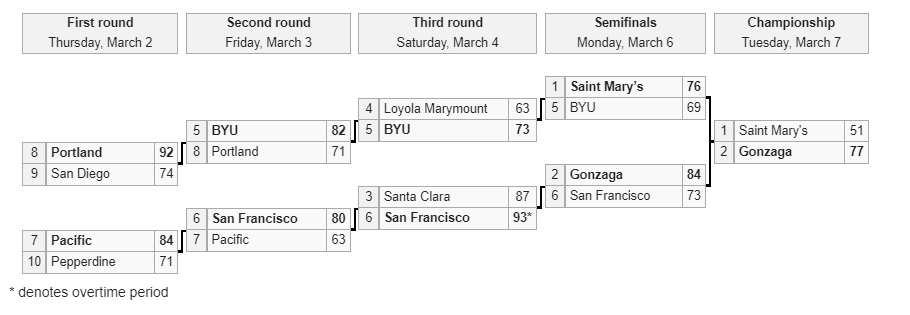 
 - En este, hay equipos que empiezan directamente en Cuartos i Semis

Ej. Estructura ASUN 2023:
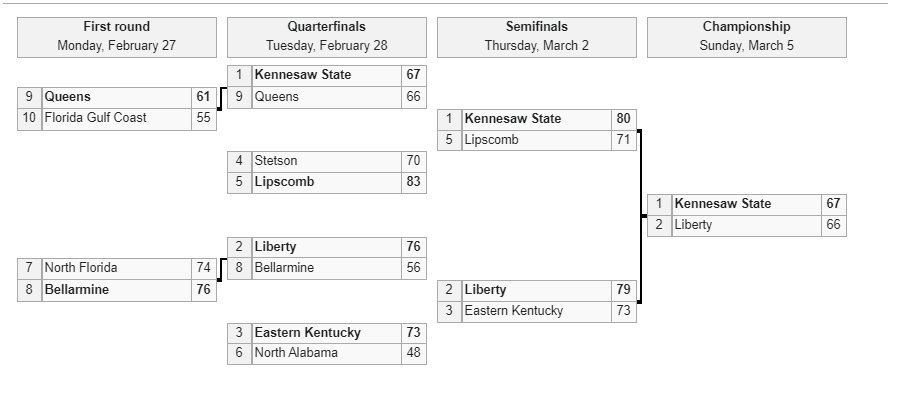
- En este, hay equipos que empiezan directamente en Cuartos


Por lo tanto, hemos creado estas variables para tener indicadores de desempeño teniendo en cuenta que los Conference Tourneys son altamente personalizables en el historico (son los sucessores del WinRateRatio, el cual no es fiable):
 - **AdjustedWins** representa el número de victorias ajustadas, donde se ha sumado 1 a la cuenta de victorias de cada equipo para reflejar la ronda en la que comenzaron.
 - **MaxRounds** muestra el número máximo de rondas en el torneo de conferencia para esa temporada y conferencia.
 - **TourneyProgress** categoriza el progreso de cada equipo en el torneo según las victorias ajustadas y el número máximo de rondas.


Utilizamos la funcion creada

In [15]:
m_conference_tourney_team_season_stats = calcular_estadisticas_conference_tourney(m_conference_tourney_games_with_stats)
m_conference_tourney_team_season_stats

C:\Users\abelb\AppData\Local\Temp\ipykernel_22896\934938341.py:79: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_game_winners = df_unified[df_unified['Wins'] == 1].groupby(['ConfAbbrev', 'Season']).apply(lambda x: x.loc[x['DayNum'].idxmax(), 'TeamID']).reset_index(name='WinnerTeamID')


,Season,TeamID,AvgPointDiff,AvgScore,AvgOppScore,AvgFGM,AvgOppFGM,AvgFGA,AvgOppFGA,AvgFGM3,...,AvgTO,AvgOppTO,AvgStl,AvgOppStl,AvgBlk,AvgOppBlk,AvgPF,AvgOppPF,TourneyProgress,AdjustedWins
0,2003,1102,-4.0,38.0,42.0,13.0,12.0,42.0,31.0,3.0,...,9.0,8.0,3.0,1.0,0.0,4.0,20.0,16.0,SecondRound,1
1,2003,1103,-2.0,77.0,79.0,28.0,31.0,59.0,57.0,11.0,...,10.0,12.0,2.0,6.0,4.0,1.0,17.0,16.0,SecondRound,1
2,2003,1104,-13.0,69.0,82.0,24.0,25.0,61.0,47.0,9.0,...,12.0,10.0,5.0,8.0,0.0,4.0,23.0,18.0,SecondRound,1
3,2003,1106,-3.0,55.0,58.0,19.0,22.0,50.0,53.0,4.0,...,20.0,14.0,6.0,8.0,2.0,2.0,18.0,18.0,SecondRound,1
4,2003,1107,-19.0,62.0,81.0,22.0,34.0,45.0,58.0,9.0,...,11.0,9.0,3.0,6.0,3.0,1.0,13.0,11.0,SecondRound,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,2023,1472,1.0,66.0,65.0,24.5,25.5,65.0,60.0,9.0,...,9.5,9.5,6.5,5.0,2.0,5.0,16.5,11.5,QuarterFinals,2
6368,2023,1473,-19.0,65.0,84.0,22.0,33.0,53.0,78.0,4.0,...,18.0,9.0,3.0,10.0,5.0,0.0,18.0,22.0,FirstRound,1
6369,2023,1474,2.5,63.5,61.0,22.0,22.5,59.0,53.0,6.0,...,12.5,12.0,6.0,6.0,0.5,4.5,17.0,19.0,QuarterFinals,2
6370,2023,1475,-14.0,54.0,68.0,19.0,19.0,65.0,51.0,8.0,...,11.0,13.0,4.0,6.0,3.0,5.0,25.0,13.0,FirstRound,1


Llegado a este punto, tenemos que seleccionar las estadisticas más útiles,
ya que no es optimo para nuestro modelo tener TANTAS, teniendo en cuenta
que tenemos más estadisticas de la Regular Season.

Antes de nada, vamos a realizar un Análisis Exploratorio de Datos (EDA) para saber como se distribuyen las estádisticas de cada equipo-temporada y las relaciones entre sí.



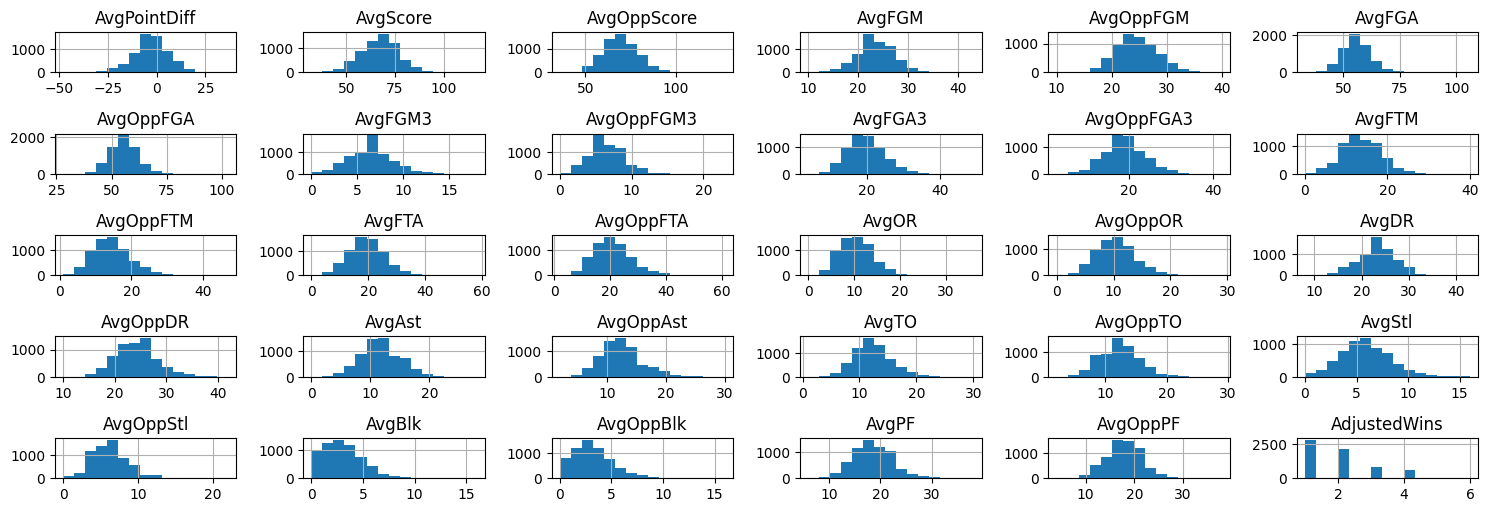

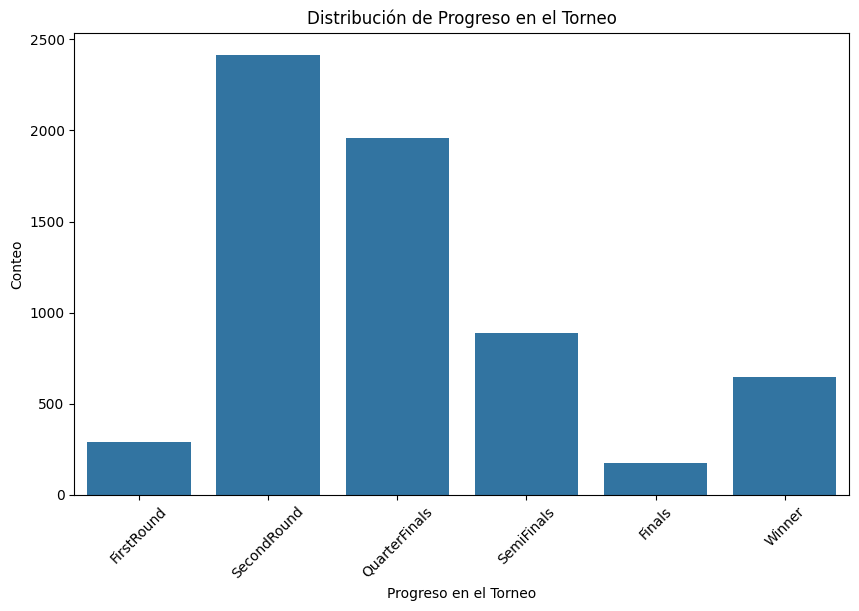

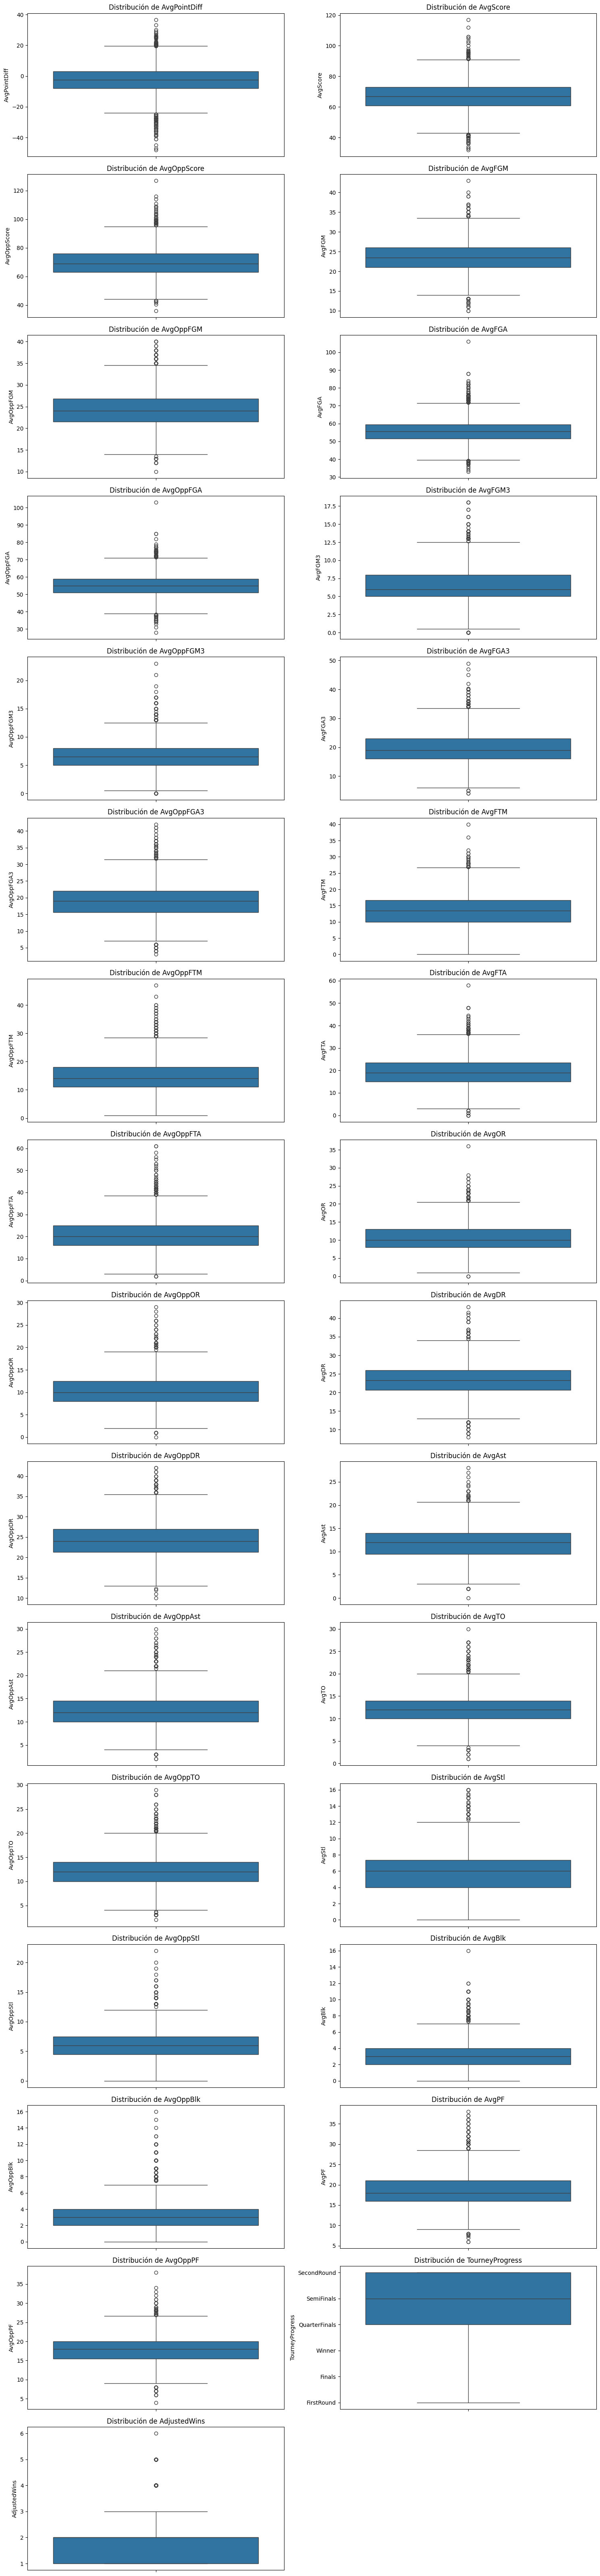

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para visualizar las distribuciones de algunas variables numéricas
m_conference_tourney_team_season_stats_eda = m_conference_tourney_team_season_stats.drop(columns=['Season', 'TeamID'], axis=1)

m_conference_tourney_team_season_stats_eda[list(m_conference_tourney_team_season_stats_eda.columns)].hist(bins=15, figsize=(15, 6), layout=(6, 6))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=m_conference_tourney_team_season_stats, x='TourneyProgress', order=['FirstRound', 'SecondRound', 'QuarterFinals', 'SemiFinals', 'Finals', 'Winner'])
plt.title('Distribución de Progreso en el Torneo')
plt.xlabel('Progreso en el Torneo')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()

# Boxplots para visualizar la dispersión y detectar posibles valores atípicos
num_plots = len(m_conference_tourney_team_season_stats_eda.columns)
num_rows = num_plots // 2 + (num_plots % 2)

plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(m_conference_tourney_team_season_stats_eda.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(data=m_conference_tourney_team_season_stats, y=col)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()


De los gráficos podemos ver que las stats tienen rangos muy diferentes de valores. A pesar que los modelos que utilizaremos no necesitan normalización (son robustos a la escala de las características), sería una buena práctica normalizar o estandarizar. **Quizás mas adelante lo haremos.

Por otro lado,  podemos ver que todas las variables siguen distribución normal, menos el WinLossRatio que esta muy sesgada. Además, no hay una gran cantidad de valores atípicos (por eso usaremos TourneyProgress y AdjustedWins).

Seguidamente, para la selección de estadisticas más relevantes vamos a hacer tres cosas:

 - 1. Eliminar estadisticas linealmente independientes (usaremos matriz de correlacion)
 - 2. Ver que estadisticas de cada equipo extraidas de los Tourney Conferences tienen mayor
correlación con los resultados de esos mismos equipos en la NCAA.
 - 3. Utilizar ML para evaluar la importancia de las características.


**Vamos con el punto 1:**

Vamos a crear una matriz de correlacion entre las estadisticas que tenemos para ver si hay parejas de estadisticas con mucha correlación y así podemos eliminar una, o bien, crear una que sea combinación de ambas.

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar One-Hot Encoding a 'TourneyProgress'
encoder = OneHotEncoder(sparse=False)
tourney_encoded = encoder.fit_transform(m_conference_tourney_team_season_stats[['TourneyProgress']])

# Convertir el resultado codificado en un DataFrame
tourney_encoded_df = pd.DataFrame(tourney_encoded, columns=encoder.get_feature_names_out(['TourneyProgress']))

# Concatenar las columnas codificadas con las columnas numéricas (excluyendo 'TeamID', 'Season' y la original 'TourneyProgress')
numerical_and_encoded_df = pd.concat([m_conference_tourney_team_season_stats.drop(columns=['TeamID', 'Season', 'TourneyProgress']), tourney_encoded_df], axis=1)

# Crear la matriz de correlación para el DataFrame que incluye las columnas codificadas
correlation_matrix = numerical_and_encoded_df.corr()

# Umbral para considerar que las variables están fuertemente correlacionadas
umbral_correlacion = 0.70

# Encontrar pares de variables fuertemente correlacionadas
pares_correlacionados = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > umbral_correlacion:
            pares_correlacionados.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Convertir la lista de pares en un DataFrame para una mejor visualización
df_pares_correlacionados = pd.DataFrame(pares_correlacionados, columns=['Variable 1', 'Variable 2', 'Correlación'])
df_pares_correlacionados.sort_values(by='Correlación', ascending=False, inplace=True)

print(df_pares_correlacionados)

      Variable 1    Variable 2  Correlación
7      AvgOppFTM     AvgOppFTA     0.933875
5         AvgFTM        AvgFTA     0.922623
10     AvgOppFTA         AvgPF     0.885685
9         AvgFTA      AvgOppPF     0.858896
1       AvgScore        AvgFGM     0.845793
8      AvgOppFTM         AvgPF     0.821412
2    AvgOppScore     AvgOppFGM     0.819020
6         AvgFTM      AvgOppPF     0.784439
11         AvgTO     AvgOppStl     0.723745
4     AvgOppFGM3    AvgOppFGA3     0.718622
12      AvgOppTO        AvgStl     0.706849
0   AvgPointDiff  AdjustedWins     0.706503
3        AvgFGM3       AvgFGA3     0.704524


c:\Users\abelb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


- Vemos que AvgOppFTM (Media de Tiros Libres anotados) y AvgOppFTA (Media de Tiros Libres) tienen alta correlacion. Vamos a crear una combinación que sea AvgFTM/AvgFTA y que indicará el Porcentaje de Tiros Libres Anotados. 
    - PD: Lo mismo hacemos para los tiros triples.

- Combinamos AvgScore (puntuacion media) y AvgFGM (media de tiros de campo anotados ) creando la variable AvgScorePerFGM (eficiencia de anotación media por tiro de campo anotado.) dada por AvgScore/AvgFGM.

- Los pares  AvgTo/AvgOppStl y AvgOppTo/AvgStl dan la misma información, por lo tanto, vamos a borrar AvgTo  y AvgStl (hemos visto en pasos posteriores que tenian menos importancia en el modelo que las otras dos.)

In [19]:
# Calculando el porcentaje de tiros libres para el equipo y sus oponentes
m_conference_tourney_team_season_stats['AvgFTPct'] = m_conference_tourney_team_season_stats['AvgFTM'] / m_conference_tourney_team_season_stats['AvgFTA']
m_conference_tourney_team_season_stats['AvgOppFTPct'] = m_conference_tourney_team_season_stats['AvgOppFTM'] / m_conference_tourney_team_season_stats['AvgOppFTA']

# Calculando el porcentaje de tiros triples para el equipo y sus oponentes
m_conference_tourney_team_season_stats['AvgFG3Pct'] = m_conference_tourney_team_season_stats['AvgFGM3'] / m_conference_tourney_team_season_stats['AvgFGA3']
m_conference_tourney_team_season_stats['AvgOppFG3Pct'] = m_conference_tourney_team_season_stats['AvgOppFGM3'] / m_conference_tourney_team_season_stats['AvgOppFGA3']

#Calculamos la eficiencia de anotación media por tiro de campo anotado
m_conference_tourney_team_season_stats['AvgScorePerFGM'] = m_conference_tourney_team_season_stats['AvgScore'] / m_conference_tourney_team_season_stats['AvgFGM']
m_conference_tourney_team_season_stats['AvgOppScorePerFGM'] = m_conference_tourney_team_season_stats['AvgOppScore'] / m_conference_tourney_team_season_stats['AvgOppFGM']

m_conference_tourney_team_season_stats = m_conference_tourney_team_season_stats.drop(columns=['AvgTO', 'AvgStl'])

# Después de calcular estas nuevas variables, podrías considerar eliminar las variables originales
columns_to_drop = ['AvgFTM', 'AvgFTA', 'AvgOppFTM', 'AvgOppFTA', 'AvgScore', 'AvgFGM', 'AvgOppScore', 'AvgOppFGM', 'AvgFGM3', 'AvgFGA3', 'AvgOppFGM3', 'AvgOppFGA3']
m_conference_tourney_team_season_stats = m_conference_tourney_team_season_stats.drop(columns=columns_to_drop)

In [21]:
m_conference_tourney_team_season_stats.columns

Index(['Season', 'TeamID', 'AvgPointDiff', 'AvgFGA', 'AvgOppFGA', 'AvgOR',
       'AvgOppOR', 'AvgDR', 'AvgOppDR', 'AvgAst', 'AvgOppAst', 'AvgOppTO',
       'AvgOppStl', 'AvgBlk', 'AvgOppBlk', 'AvgPF', 'AvgOppPF',
       'TourneyProgress', 'AdjustedWins', 'AvgFTPct', 'AvgOppFTPct',
       'AvgFG3Pct', 'AvgOppFG3Pct', 'AvgScorePerFGM', 'AvgOppScorePerFGM'],
      dtype='object')

**Vamos con el punto 2:**

2.1. Vamos a separar el dataset del historico de la NCAA en Equipo-Temporada-Victorias

In [22]:
mncaa_tourney_detailed_results = pd.read_csv(data_dir + "/MNCAATourneyDetailedResults.csv")

# Dividir el DataFrame en victorias y derrotas para contar las victorias de cada equipo por temporada
df_wins = mncaa_tourney_detailed_results[['Season', 'WTeamID']].rename(columns={'WTeamID': 'TeamID'})
df_losses = mncaa_tourney_detailed_results[['Season', 'LTeamID']].rename(columns={'LTeamID': 'TeamID'})

# Contar las victorias para cada equipo en cada temporada
wins_by_team_season = df_wins.groupby(['Season', 'TeamID']).size().reset_index(name='WinsNCAA')
losses_by_team_season = df_losses.groupby(['Season', 'TeamID']).size().reset_index(name='LossesNCAA')

# Unir los conteos de victorias con los conteos de derrotas para asegurar que todos los equipos estén representados
team_ncaa_wins = pd.merge(wins_by_team_season, losses_by_team_season, on=['Season', 'TeamID'], how='outer')

# Rellenar los valores faltantes con 0 para los equipos que no tienen victorias
team_ncaa_wins['WinsNCAA'] = team_ncaa_wins['WinsNCAA'].fillna(0)

team_ncaa_wins.drop(columns='LossesNCAA', inplace=True)

team_ncaa_wins

,Season,TeamID,WinsNCAA
0,2003,1104,0.0
1,2003,1112,3.0
2,2003,1113,1.0
3,2003,1120,2.0
4,2003,1122,0.0
...,...,...,...
1330,2023,1433,0.0
1331,2023,1436,0.0
1332,2023,1438,0.0
1333,2023,1452,0.0


2.2. Unimos, para cada equipo-temporada,  las estadisticas del Conference Tourney y las victorias en la NCAA.


In [23]:
# Unir los DataFrames m_conference_tourney_team_season_stats y team_ncaa_wins
combined_df = pd.merge(m_conference_tourney_team_season_stats, team_ncaa_wins, on=['Season', 'TeamID'], how='right')

In [24]:
combined_df

,Season,TeamID,AvgPointDiff,AvgFGA,AvgOppFGA,AvgOR,AvgOppOR,AvgDR,AvgOppDR,AvgAst,...,AvgOppPF,TourneyProgress,AdjustedWins,AvgFTPct,AvgOppFTPct,AvgFG3Pct,AvgOppFG3Pct,AvgScorePerFGM,AvgOppScorePerFGM,WinsNCAA
0,2003,1104,-13.000000,61.000000,47.000000,15.000000,7.000000,18.000000,22.000000,8.000000,...,18.000000,SecondRound,1.0,0.800000,0.785714,0.473684,0.416667,2.875000,3.280000,0.0
1,2003,1112,-7.000000,88.000000,69.000000,19.000000,11.000000,25.000000,32.000000,19.000000,...,19.000000,SecondRound,1.0,0.842105,0.892857,0.194444,0.466667,2.696970,3.000000,3.0
2,2003,1113,-1.000000,69.000000,55.000000,17.000000,10.000000,20.000000,17.000000,13.000000,...,21.000000,SecondRound,1.0,0.695652,0.807692,0.266667,0.444444,2.645161,3.074074,1.0
3,2003,1120,-3.500000,58.000000,55.000000,11.000000,12.000000,19.500000,26.500000,8.000000,...,18.500000,QuarterFinals,2.0,0.741935,0.615385,0.304348,0.305556,2.638298,2.729167,2.0
4,2003,1122,4.000000,54.000000,55.666667,11.333333,12.000000,25.000000,25.000000,13.000000,...,23.000000,Winner,4.0,0.613333,0.612903,0.365385,0.300000,2.928571,2.757143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2023,1433,14.000000,53.333333,56.333333,6.666667,9.333333,24.666667,21.666667,18.000000,...,18.666667,Winner,4.0,0.600000,0.716981,0.456140,0.277778,2.694118,2.791045,0.0
1331,2023,1436,20.666667,57.333333,52.666667,5.666667,7.333333,24.000000,23.000000,14.333333,...,13.666667,Winner,4.0,0.727273,0.729730,0.357143,0.354839,2.640449,2.790323,0.0
1332,2023,1438,6.333333,52.333333,50.333333,7.666667,7.000000,23.666667,24.666667,12.666667,...,15.333333,SemiFinals,3.0,0.709091,0.732143,0.285714,0.301587,2.757143,3.052632,0.0
1333,2023,1452,-0.500000,61.000000,59.000000,10.000000,10.500000,23.000000,23.500000,13.500000,...,17.000000,QuarterFinals,2.0,0.785714,0.724138,0.288889,0.302326,2.673077,2.641509,0.0


In [25]:
combined_df_clean = combined_df.dropna()

In [26]:
combined_df_clean

,Season,TeamID,AvgPointDiff,AvgFGA,AvgOppFGA,AvgOR,AvgOppOR,AvgDR,AvgOppDR,AvgAst,...,AvgOppPF,TourneyProgress,AdjustedWins,AvgFTPct,AvgOppFTPct,AvgFG3Pct,AvgOppFG3Pct,AvgScorePerFGM,AvgOppScorePerFGM,WinsNCAA
0,2003,1104,-13.000000,61.000000,47.000000,15.000000,7.000000,18.000000,22.000000,8.000000,...,18.000000,SecondRound,1.0,0.800000,0.785714,0.473684,0.416667,2.875000,3.280000,0.0
1,2003,1112,-7.000000,88.000000,69.000000,19.000000,11.000000,25.000000,32.000000,19.000000,...,19.000000,SecondRound,1.0,0.842105,0.892857,0.194444,0.466667,2.696970,3.000000,3.0
2,2003,1113,-1.000000,69.000000,55.000000,17.000000,10.000000,20.000000,17.000000,13.000000,...,21.000000,SecondRound,1.0,0.695652,0.807692,0.266667,0.444444,2.645161,3.074074,1.0
3,2003,1120,-3.500000,58.000000,55.000000,11.000000,12.000000,19.500000,26.500000,8.000000,...,18.500000,QuarterFinals,2.0,0.741935,0.615385,0.304348,0.305556,2.638298,2.729167,2.0
4,2003,1122,4.000000,54.000000,55.666667,11.333333,12.000000,25.000000,25.000000,13.000000,...,23.000000,Winner,4.0,0.613333,0.612903,0.365385,0.300000,2.928571,2.757143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2023,1433,14.000000,53.333333,56.333333,6.666667,9.333333,24.666667,21.666667,18.000000,...,18.666667,Winner,4.0,0.600000,0.716981,0.456140,0.277778,2.694118,2.791045,0.0
1331,2023,1436,20.666667,57.333333,52.666667,5.666667,7.333333,24.000000,23.000000,14.333333,...,13.666667,Winner,4.0,0.727273,0.729730,0.357143,0.354839,2.640449,2.790323,0.0
1332,2023,1438,6.333333,52.333333,50.333333,7.666667,7.000000,23.666667,24.666667,12.666667,...,15.333333,SemiFinals,3.0,0.709091,0.732143,0.285714,0.301587,2.757143,3.052632,0.0
1333,2023,1452,-0.500000,61.000000,59.000000,10.000000,10.500000,23.000000,23.500000,13.500000,...,17.000000,QuarterFinals,2.0,0.785714,0.724138,0.288889,0.302326,2.673077,2.641509,0.0


2.3. Creamos una Matriz de Correlación para ver que estadisticas de la Conference Tourney estan mas correlacionadas con el desempeño en la NCAA

c:\Users\abelb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


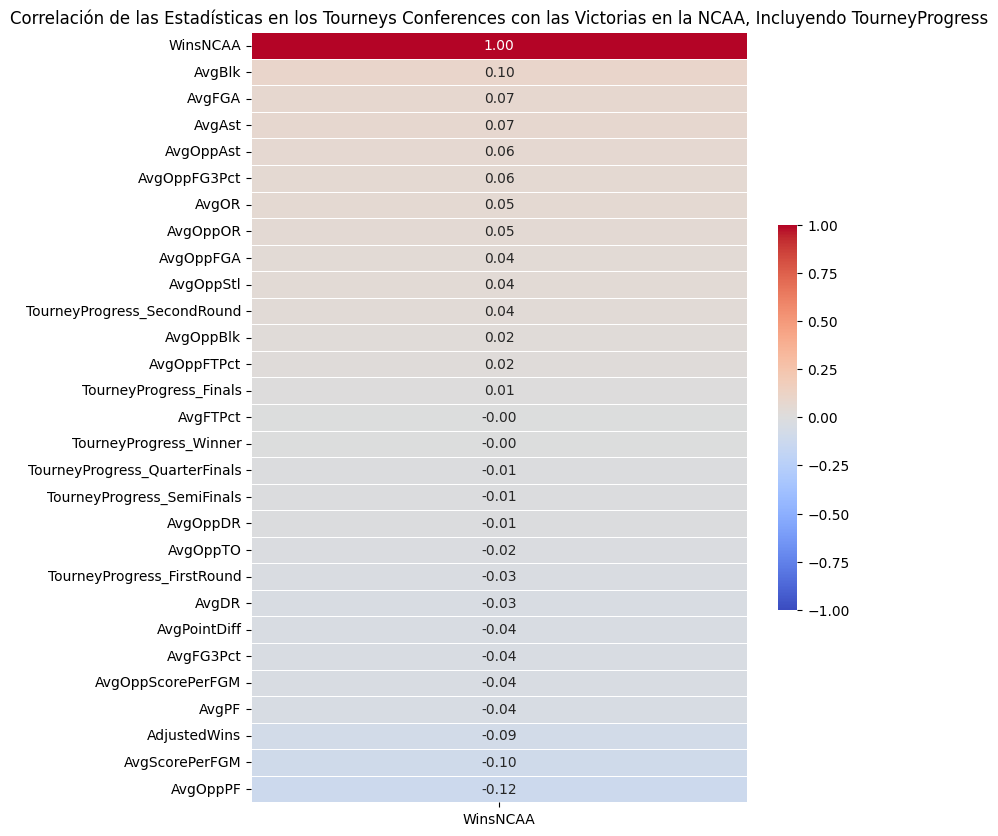

[('WinsNCAA', 1.0), ('AvgBlk', 0.1013895852923158), ('AvgFGA', 0.0727567057129585), ('AvgAst', 0.07228125703288311), ('AvgOppAst', 0.06272475433947465), ('AvgOppFG3Pct', 0.05935515966534214), ('AvgOR', 0.05477869612234631), ('AvgOppOR', 0.04835523688152045), ('AvgOppFGA', 0.044294607300482965), ('AvgOppStl', 0.042334952465822875), ('TourneyProgress_SecondRound', 0.03609861764025053), ('AvgOppBlk', 0.024891190482925523), ('AvgOppFTPct', 0.021778269796703425), ('TourneyProgress_Finals', 0.005473467649990233), ('AvgFTPct', -0.003945475822344358), ('TourneyProgress_Winner', -0.004883481548717196), ('TourneyProgress_QuarterFinals', -0.008167655602754662), ('TourneyProgress_SemiFinals', -0.010467911433696136), ('AvgOppDR', -0.014039349559846528), ('AvgOppTO', -0.022793377314779057), ('TourneyProgress_FirstRound', -0.02878007286374658), ('AvgDR', -0.033613990328644504), ('AvgPointDiff', -0.03633377850651764), ('AvgFG3Pct', -0.03820334679453032), ('AvgOppScorePerFGM', -0.03904048689727482), ('

In [37]:
from sklearn.preprocessing import OneHotEncoder

# Asumiendo que 'combined_df_clean' contiene 'TourneyProgress' y 'WinsNCAA'
# Aplicar One-Hot Encoding a 'TourneyProgress'
encoder = OneHotEncoder(sparse=False)
tourney_encoded = encoder.fit_transform(combined_df_clean[['TourneyProgress']])

# Convertir el resultado codificado en un DataFrame
tourney_encoded_df = pd.DataFrame(tourney_encoded, columns=encoder.get_feature_names_out(['TourneyProgress']))

# Concatenar las columnas codificadas con las columnas numéricas (excluyendo 'TeamID', 'Season' y la original 'TourneyProgress')
numerical_and_encoded_df = pd.concat([combined_df_clean.drop(columns=['TeamID', 'Season', 'TourneyProgress']), tourney_encoded_df], axis=1)

# Crear la matriz de correlación para el DataFrame que incluye las columnas codificadas
correlation_matrix = numerical_and_encoded_df.corr()

# Extraer las correlaciones con respecto a 'WinsNCAA'
wins_correlation = correlation_matrix[['WinsNCAA']].sort_values(by='WinsNCAA', ascending=False)

# Crear el mapa de calor para las correlaciones de 'WinsNCAA'
plt.figure(figsize=(8, 10))
sns.heatmap(wins_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5}, linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlación de las Estadísticas en los Tourneys Conferences con las Victorias en la NCAA, Incluyendo TourneyProgress')
plt.show()

correlation_list = [(row.Index, row.WinsNCAA) for row in wins_correlation.itertuples()]

print(correlation_list)

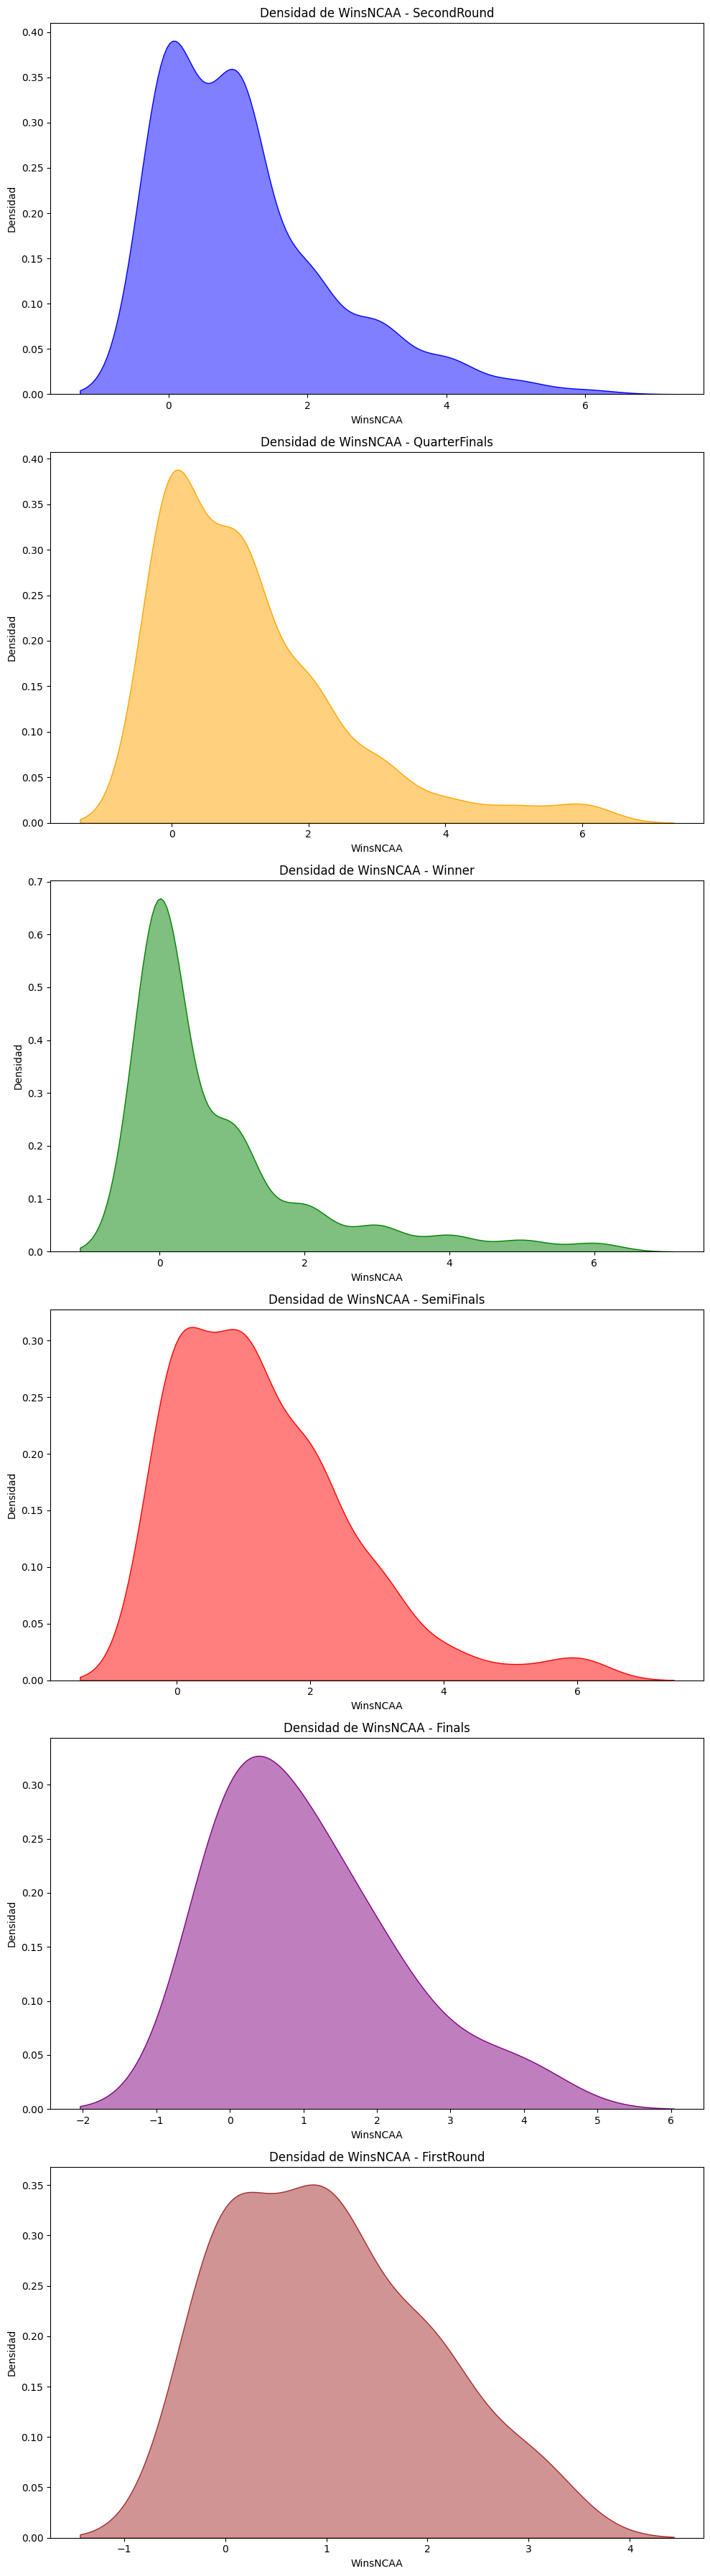

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los colores para cada categoría de 'TourneyProgress'
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
categories = combined_df_clean['TourneyProgress'].unique()
color_dict = dict(zip(categories, colors))

# Número de categorías únicas
n_categories = len(categories)

# Crear subgráficos, uno para cada categoría
fig, axes = plt.subplots(n_categories, 1, figsize=(10, 6 * n_categories))

# Verificar si hay solo una categoría y, por lo tanto, axes no es un array
if n_categories == 1:
    axes = [axes]

for i, category in enumerate(categories):
    subset = combined_df_clean[combined_df_clean['TourneyProgress'] == category]
    sns.kdeplot(subset['WinsNCAA'], ax=axes[i], fill=True, alpha=0.5, color=color_dict[category])
    axes[i].set_title(f'Densidad de WinsNCAA - {category}')
    axes[i].set_xlabel('WinsNCAA')
    axes[i].set_ylabel('Densidad')

# Ajustar el layout para evitar la superposición
plt.tight_layout()
plt.show()


Podmos ver que los que les fueron bien en los Conference Tourney's tienen menos varianza en la NCAA (son equipos más solidos)

De acuerdo con el mapa de calor proporcionado, seleccionaremos las 4 estadísticas de los Conference Tourney con las correlaciones positivas más fuertes y las 4 estadísticas con las correlaciones negativas más fuertes con respecto a las victorias en la NCAA.

Estas son:

- Estadísticas con las correlaciones positivas más fuertes : 'AvgBlk', 'AvgFGA', 'AvgAst', 'AvgFGM'

- Estadísticas con las correlaciones negativas más fuertes: 'AvgOppPF', 'WinLossRatio', 'AvgFTA', 'AvgFTM'



**Vamos con el punto 3:**


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Suponiendo que combined_df_clean es tu DataFrame
# Identificar la columna categórica
categorical_column = 'TourneyProgress'

# Aplicar One-Hot Encoding a la columna categórica
onehot_encoder = OneHotEncoder(sparse=False)
categorical_encoded = onehot_encoder.fit_transform(combined_df_clean[[categorical_column]])

# Convertir el resultado en un DataFrame y asignar nombres de columnas
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=[f"{categorical_column}_{category}" for category in onehot_encoder.categories_[0]]).reset_index(drop=True)

# Concatenar con el DataFrame original (sin la columna categórica y otras columnas no deseadas)
X = combined_df_clean.drop(columns=['WinsNCAA', 'TeamID', 'Season', categorical_column]).reset_index(drop=True)
X = pd.concat([X, categorical_encoded_df], axis=1)

y = combined_df_clean['WinsNCAA']

# Ajustar un modelo de Random Forest
model = RandomForestRegressor()
model.fit(X, y)

# Obtener la importancia de las características
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)


c:\Users\abelb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
feature_importance

,Feature,Importance
20,AvgScorePerFGM,0.073092
19,AvgOppFG3Pct,0.060959
18,AvgFG3Pct,0.057305
17,AvgOppFTPct,0.054722
14,AvgOppPF,0.052282
0,AvgPointDiff,0.050095
11,AvgBlk,0.047268
6,AvgOppDR,0.046978
16,AvgFTPct,0.046901
10,AvgOppStl,0.043931


PD: Aqui no se ve pero, gracias a combinar columnas hemos conseguido que las columnas resultantes absorvan la importancia que tenian ambas y incluso augmenten el computo. Es decir, feature importance de AvgFGM + AvgFGT < feature importance AvgFTPct

**Así quedaría el Dataset final de Stats del Conference Tourney teniendo en cuenta las estadisticas no linealmente independientes, las que más correlacion tienen con la NCAA y las mas importantes a la hora de predecir las victorias en la NCAA**

In [43]:
m_conference_tourney_team_season_stats_final = m_conference_tourney_team_season_stats[['TeamID', 'Season', 'TourneyProgress',
                                                                                       'AdjustedWins', 'AvgPointDiff',
                                                                                       'AvgScorePerFGM', 'AvgOppFG3Pct',
                                                                                       'AvgFG3Pct', 'AvgOppFTPct',                                         
                                                                                       'AvgOppPF', 'AvgBlk',
                                                                                       ]]

m_conference_tourney_team_season_stats_final

,TeamID,Season,TourneyProgress,AdjustedWins,AvgPointDiff,AvgScorePerFGM,AvgOppFG3Pct,AvgFG3Pct,AvgOppFTPct,AvgOppPF,AvgBlk
0,1102,2003,SecondRound,1,-4.0,2.923077,0.571429,0.187500,0.560000,16.0,0.0
1,1103,2003,SecondRound,1,-2.0,2.750000,0.352941,0.379310,0.785714,16.0,4.0
2,1104,2003,SecondRound,1,-13.0,2.875000,0.416667,0.473684,0.785714,18.0,0.0
3,1106,2003,SecondRound,1,-3.0,2.894737,0.272727,0.250000,0.647059,18.0,2.0
4,1107,2003,SecondRound,1,-19.0,2.818182,0.312500,0.450000,0.615385,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6367,1472,2023,QuarterFinals,2,1.0,2.693878,0.261905,0.333333,0.629630,11.5,2.0
6368,1473,2023,FirstRound,1,-19.0,2.954545,0.300000,0.235294,0.750000,22.0,5.0
6369,1474,2023,QuarterFinals,2,2.5,2.886364,0.264151,0.260870,0.514286,19.0,0.5
6370,1475,2023,FirstRound,1,-14.0,2.842105,0.400000,0.258065,0.628571,13.0,3.0


Ya tendríamos el dataset completado :)

In [42]:
m_conference_tourney_team_season_stats_final.to_csv("MConferenceTourneyFiltered.csv", index=False)